In [17]:
import warnings
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

csv_path="D:\pythonML-class\Wildfire_Risk_Prediction.csv"
df= pd.read_csv(csv_path)
df

,Temperature_C,Humidity_%,Wind_Speed_kmph,Rainfall_mm,Vegetation_Index,Risk_Level
0,26.2,61.4,4.1,8.4,0.70,Medium
1,43.5,16.7,36.1,13.9,0.31,High
2,37.0,22.9,20.2,8.9,0.60,High
3,33.0,81.9,33.1,4.4,0.62,Medium
4,19.7,58.5,12.8,6.0,0.50,Medium
...,...,...,...,...,...,...
195,25.5,84.5,19.0,43.6,0.26,Low
196,36.8,78.7,26.7,46.6,0.84,Medium
197,41.9,44.3,6.9,28.3,0.30,Medium
198,41.6,70.1,7.7,34.8,0.87,Medium


In [18]:
# ensuring required columns are present
if 'Risk_Level' not in df.columns:
    raise ValueError("The required column 'Risk_Level' is missing from the dataset.")

df['Risk_Label'] = df['Risk_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df

,Temperature_C,Humidity_%,Wind_Speed_kmph,Rainfall_mm,Vegetation_Index,Risk_Level,Risk_Label
0,26.2,61.4,4.1,8.4,0.70,Medium,1
1,43.5,16.7,36.1,13.9,0.31,High,2
2,37.0,22.9,20.2,8.9,0.60,High,2
3,33.0,81.9,33.1,4.4,0.62,Medium,1
4,19.7,58.5,12.8,6.0,0.50,Medium,1
...,...,...,...,...,...,...,...
195,25.5,84.5,19.0,43.6,0.26,Low,0
196,36.8,78.7,26.7,46.6,0.84,Medium,1
197,41.9,44.3,6.9,28.3,0.30,Medium,1
198,41.6,70.1,7.7,34.8,0.87,Medium,1


In [32]:
df['Wildfire_Risk']=df['Risk_Level'].map({'Low':0,'Medium':0,'High':1})
df

,Temperature_C,Humidity_%,Wind_Speed_kmph,Rainfall_mm,Vegetation_Index,Risk_Level,Risk_Label,Wildfire_Risk
0,26.2,61.4,4.1,8.4,0.70,Medium,1,0
1,43.5,16.7,36.1,13.9,0.31,High,2,1
2,37.0,22.9,20.2,8.9,0.60,High,2,1
3,33.0,81.9,33.1,4.4,0.62,Medium,1,0
4,19.7,58.5,12.8,6.0,0.50,Medium,1,0
...,...,...,...,...,...,...,...,...
195,25.5,84.5,19.0,43.6,0.26,Low,0,0
196,36.8,78.7,26.7,46.6,0.84,Medium,1,0
197,41.9,44.3,6.9,28.3,0.30,Medium,1,0
198,41.6,70.1,7.7,34.8,0.87,Medium,1,0


In [33]:
print('\n Rist_Level value counts:\n', df['Risk_Level'].value_counts())
print('\Risk_Label value counts:\n', df['Risk_Label'].value_counts())
print('\n Wildfire_Risk value counts:\n', df['Wildfire_Risk'].value_counts())



 Rist_Level value counts:
 Risk_Level
Medium    133
Low        57
High       10
Name: count, dtype: int64
\Risk_Label value counts:
 Risk_Label
1    133
0     57
2     10
Name: count, dtype: int64

 Wildfire_Risk value counts:
 Wildfire_Risk
0    190
1     10
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

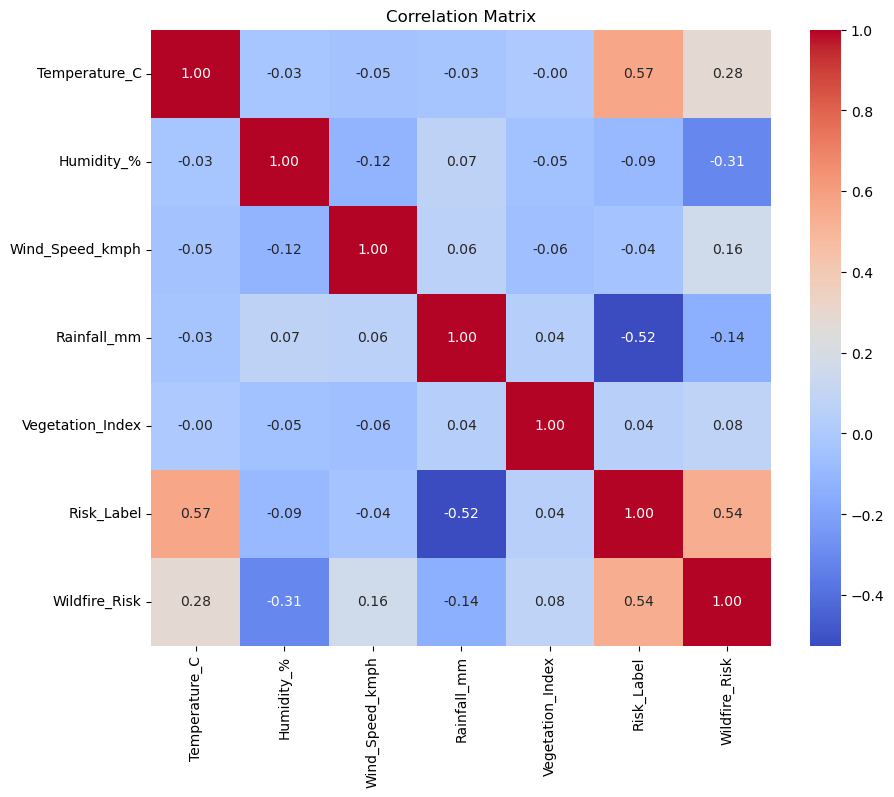

In [34]:
#eda
numeric_df = df.select_dtypes(include=[numpy.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')


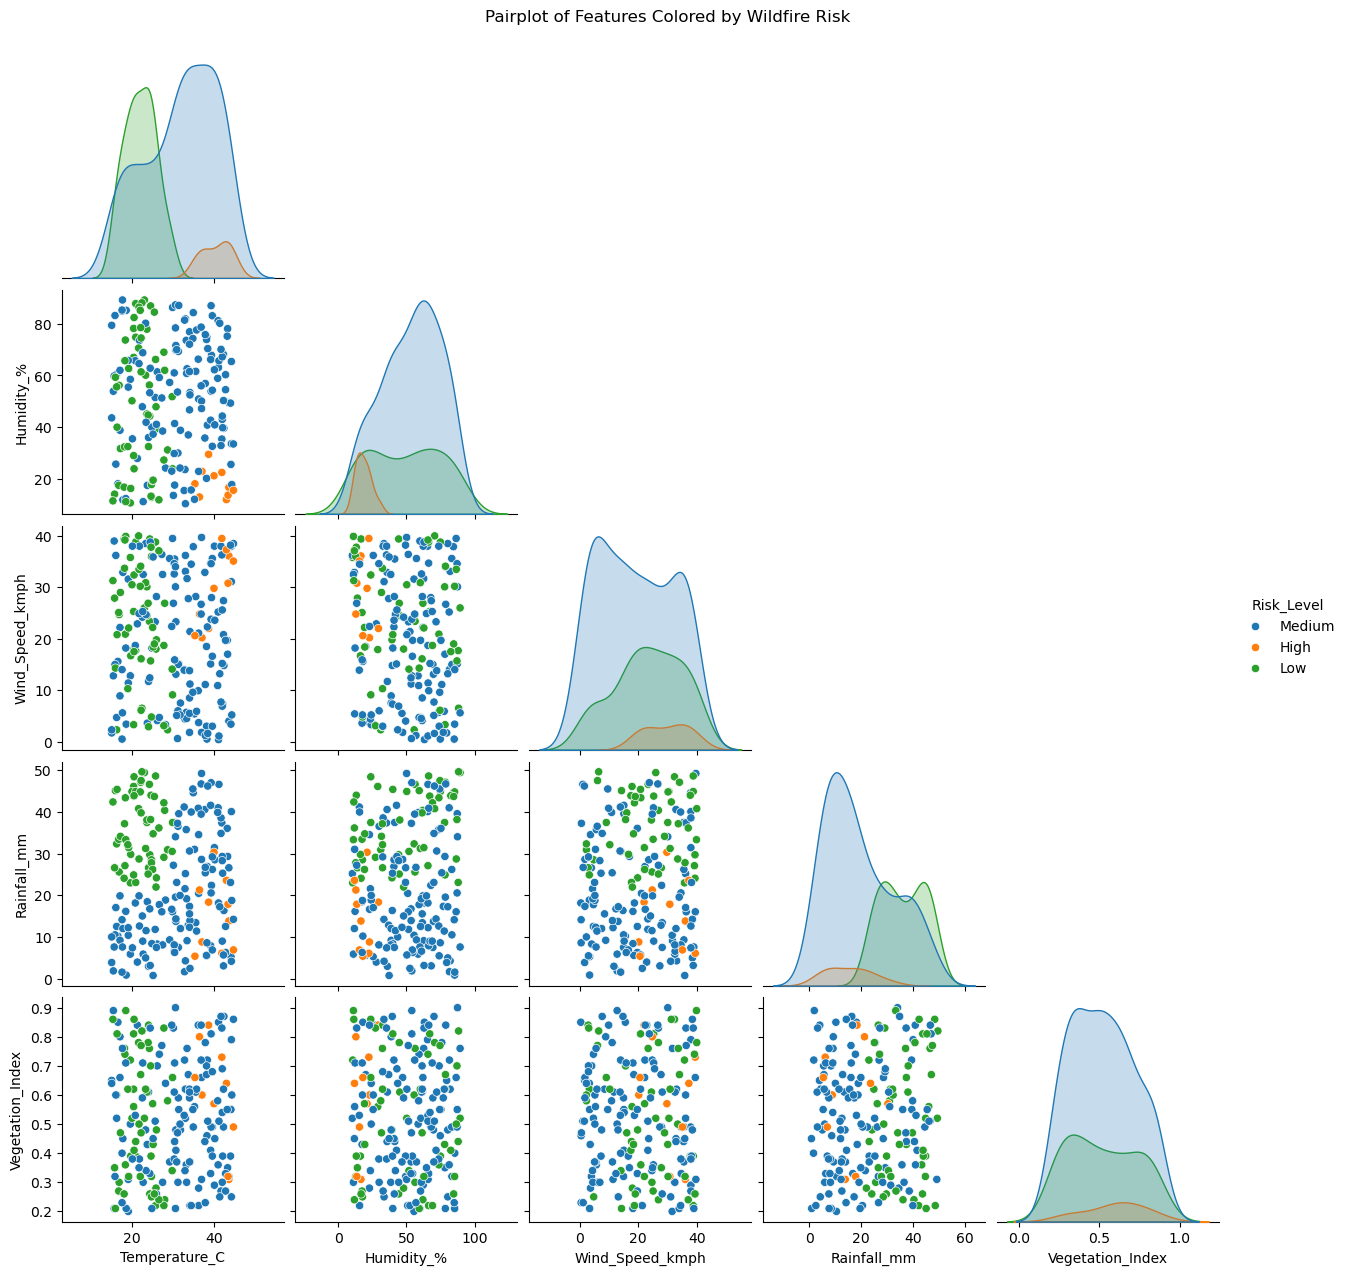

In [35]:
#optional: pairplot
try:
    sns.pairplot(df,vars=['Temperature_C', 'Humidity_%','Wind_Speed_kmph', 'Rainfall_mm','Vegetation_Index'], hue='Risk_Level',corner=True)
    plt.suptitle('Pairplot of Features Colored by Wildfire Risk', y=1.02)
    plt.show()
except Exception as e:
    warnings.warn(f"Pairplot could not be generated: {e}")


In [36]:
#preparing features and choosing target type
features=['Temperature_C','Humidity_%','Wind_Speed_kmph','Rainfall_mm','Vegetation_Index']
X=df[features]


In [37]:
#setting the targets
#for binary classification (high vs not) use 'wildfire_risk' 0/1
#for multiclass classificcation use 'Risk lable' (0/1/2)
binary_target=True
target_column='Wildfire_Risk' if binary_target else 'Risk_Label'
y=df[target_column]
print(f'Target column selected: {target_column}')

Target column selected: Wildfire_Risk


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print('Training set size:',X_train.shape,X_test.shape)

Training set size: (160, 5) (40, 5)


In [39]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#prediction and evaluation
#confusion matrix and classification 
#accuracy

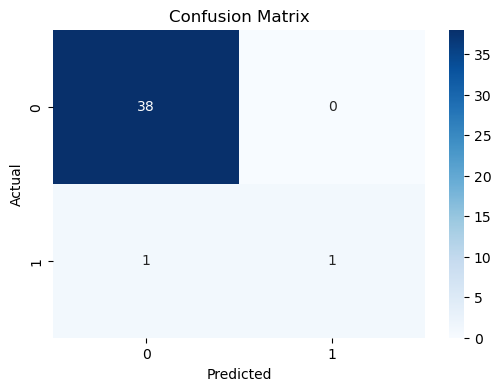

In [58]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [59]:
print('\nClassification Report:\n',classification_report(y_test,y_pred))
print(f'\nAccuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.50      0.67         2

    accuracy                           0.97        40
   macro avg       0.99      0.75      0.83        40
weighted avg       0.98      0.97      0.97        40


Accuracy Score:97.50%


In [61]:
#features importance    
importances = pd.Series(model.feature_importances_, index=features, name='Importance').sort_values(ascending=False)
importances

Temperature_C       0.322630
Humidity_%          0.310561
Wind_Speed_kmph     0.155220
Rainfall_mm         0.128988
Vegetation_Index    0.082601
Name: Importance, dtype: float64

In [63]:
#cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()*100:.2f}%')


Cross-Validation Accuracy Scores: [0.975 0.95  0.925 1.    0.975]
Mean CV Accuracy: 96.50%
